# Read in and Combine Data

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, LogisticRegression, RidgeCV, Ridge, ElasticNetCV, ElasticNet, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, log_loss, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
red = pd.read_csv('/content/winequality-red.csv', sep=';')
white = pd.read_csv('/content/winequality-white.csv', sep=';')

In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* Since each dataset has the same number and types of features, they can be combined.
* After merging, it would no longer be possible to distinguish between white and red.
* To ensure differentiation after merging, a new feature is added to each dataset.
* A column with a value of 0 is added for red, and a column with a value of 1 is added for white, allowing distinction even after merging.

In [ ]:
# A new variable, 'type', is added: red is assigned 0, and white is assigned 1.
red['type'] = 0
white['type'] = 1

In [ ]:
# The two dataframes are merged into a single dataframe.
wine_data = pd.concat([red, white], axis=0, ignore_index=True)

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


#  Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  wine_data.drop("alcohol", axis = 1),
  wine_data["alcohol"],  # set target
  test_size=0.20,
  random_state=42,
  stratify = wine_data["type"]
  )

In [ ]:
# The proportion of red and white samples in each dataset is checked.
print(X_train['type'].value_counts())
print(X_test['type'].value_counts())

type
1    3918
0    1279
Name: count, dtype: int64
type
1    980
0    320
Name: count, dtype: int64


# Regression Task (alcohol as Response)

### Train Models

 #### Fit four different multiple linear regression models.
   - At least one should include interaction term
   - At least one should include some polynomial terms (you may want to standardize your predictors
 but that is up to you)
   - Use CV to select your best MLR model

1. Standard model

In [ ]:
mlr_reg1 = LinearRegression()

In [ ]:
cv1 = cross_validate(mlr_reg1,
                     X_train,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

# Calculate the average RMSE
rmse_scores1 = np.sqrt(-cv1['test_score'])

2. Including interaction terms
* It is important to select only key variables for inclusion in interaction terms. This approach helps reduce the risk of overfitting. To select variables, correlation analysis is conducted. As a result, only the three variables most highly correlated with alcohol are chosen.  

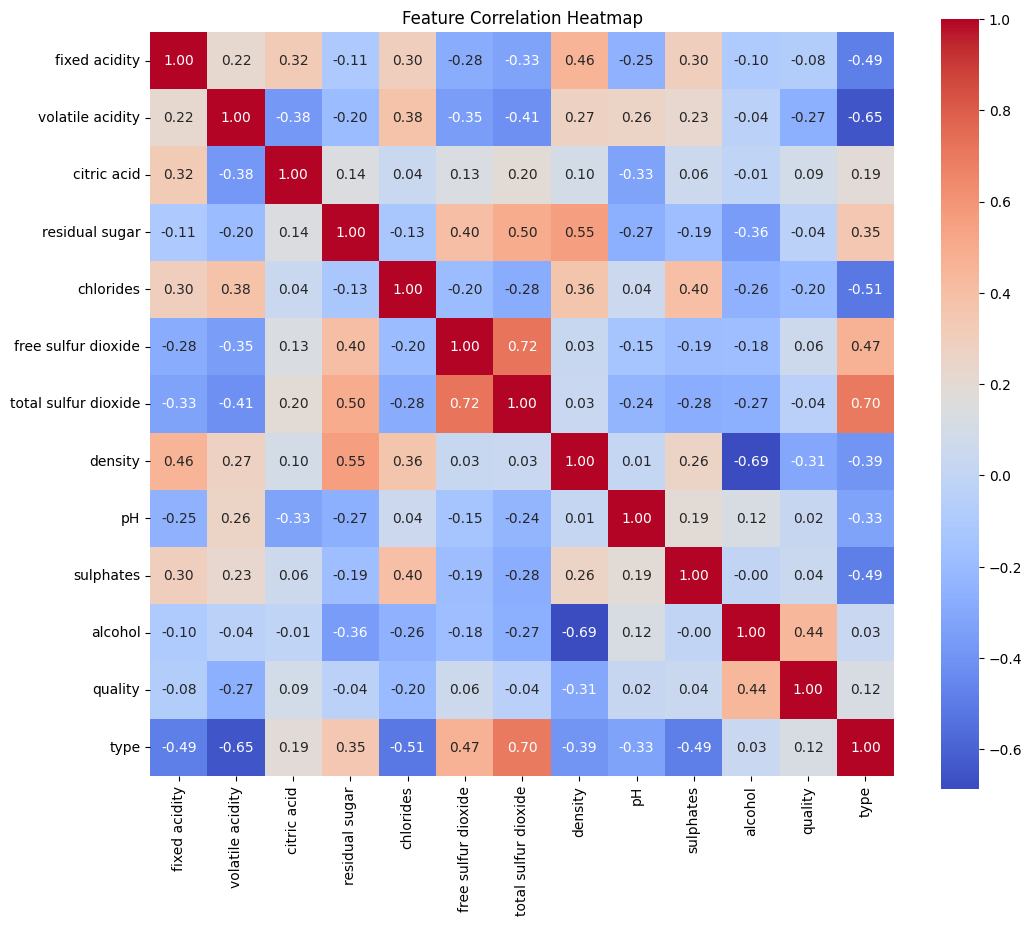

In [ ]:
# Compute the correlation matrix
corr_matrix = wine_data.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Select the chosen variables.
features = ["density", "quality", "residual sugar", "chlorides"]

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_poly1 = poly.fit_transform(X_train[features])

In [ ]:
# Exclude the features used for polynomial transformation from the original dataset.
X_train_remaining = X_train.drop(columns=features)

# Horizontally merge the remaining original features with the polynomial features.
X_train_combined = np.hstack((X_train_remaining, X_train_poly1))

In [ ]:
cv2 = cross_validate(mlr_reg1,
                     X_train_combined,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

rmse_scores2 = np.sqrt(-cv2['test_score'])

3. Including polynomial terms

In [ ]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train[features])

In [ ]:
# Combine the original dataset with the polynomial terms horizontally.
X_train_combined2 = np.hstack((X_train, X_train_poly2))

In [ ]:
cv3 = cross_validate(mlr_reg1,
                     X_train_combined2,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

rmse_scores3 = np.sqrt(-cv3['test_score'])

4. Including polynomial terms + add more feature

In [ ]:
# Selected variables
features2 = ["density", "quality", "residual sugar", "chlorides", "total sulfur dioxide"]

In [ ]:
X_train_poly3 = poly2.fit_transform(X_train[features2])
X_train_combined3 = np.hstack((X_train, X_train_poly3))

In [ ]:
cv4 = cross_validate(mlr_reg1,
                     X_train_combined3,
                     y_train,
                     cv=5,
                     scoring='neg_mean_squared_error'
                     )

rmse_scores4 = np.sqrt(-cv4['test_score'])

#### Select Best MLR model
* As a result of comparing the four models, the model that included the most variables with polynomial terms showed the best performance. Therefore, this model was selected as the best model.

In [ ]:
print(np.mean(rmse_scores1))
print(np.mean(rmse_scores2))
print(np.mean(rmse_scores3))
print(np.mean(rmse_scores4))

0.5086429219515878
0.5116309841828065
0.4405186347516308
0.4366613364572859


#### LASSO model

In [ ]:
alphas = np.logspace(-4, 4, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_combined3, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.708048575364046, tolerance: 0.5911440732039663
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248.4783738726219, tolerance: 0.5911440732039663
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437.79284476152543, tolerance: 0.5911440732039663
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=5, max_iter=10000, random_state=42)

In [ ]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso_best = lasso.fit(X_train_combined3, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.220e+02, tolerance: 7.416e-01
  model = cd_fast.enet_coordinate_descent(


#### Ridge Regression model

In [ ]:
alphas = np.logspace(-4, 4, 100)
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', store_cv_values=True)
ridge_cv.fit(X_train_combined3, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        scoring='neg_mean_squared_error', store_cv_values=True)

In [ ]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge_best = ridge.fit(X_train_combined3, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.28479e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


#### Elastic Net model

In [ ]:
alphas = np.logspace(-4, 4, 100)
l1_ratios = np.linspace(0.1, 1.0, 10)

In [ ]:
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_best = elastic_net_cv.fit(X_train_combined3, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.77542588562437, tolerance: 0.5911440732039663
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319.08534774975624, tolerance: 0.5911440732039663
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512.9468801920536, tolerance: 0.5911440732039663
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergen

### Test Models

Multiple Linear Regression models

In [ ]:
X_test_poly = poly2.fit_transform(X_test[features2])
X_test_combined = np.hstack((X_test, X_test_poly))

In [ ]:
mlr_reg1 = LinearRegression()
mlr_reg1.fit(X_train_combined3, y_train)
y_pred_mlr = mlr_reg1.predict(X_test_combined)
rmse_mlr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

LASSO

In [ ]:
y_pred_lasso = lasso_best.predict(X_test_combined)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

Ridge Regression model

In [ ]:
y_pred_ridge = ridge_best.predict(X_test_combined)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

Elastic Net model

In [ ]:
y_pred_elastic = elastic_best.predict(X_test_combined)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

In [ ]:
mae_values = [mae_mlr, mae_lasso, mae_ridge, mae_elastic]
rmse_values = [rmse_mlr, rmse_lasso, rmse_ridge, rmse_elastic]

print("MAE values:", mae_values)
print("RMSE values:", rmse_values)

MAE values: [0.32423127019032655, 0.3512889363179169, 0.3349691277855228, 0.3512889363179169]
RMSE values: [np.float64(0.44137046572066285), np.float64(0.4613783730370999), np.float64(0.45320914908366866), np.float64(0.4613783730370999)]


multiple linear regression model의 성능이 가장 우수한 것으로 판단됩니다.

#  Classification Task (Wine Type as Response)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
  wine_data.drop("type", axis = 1),
  wine_data["type"],
  test_size=0.20,
  random_state=42,
  stratify = wine_data["type"]
  )

1. Standard model

In [ ]:
log_reg = LogisticRegression(max_iter=500)

In [ ]:
cv1 = cross_validate(
    log_reg,
    X_train,
    y_train,
    cv=5,
    scoring='neg_log_loss',
    return_train_score=True
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2. Including interaction terms

In [ ]:
features = ["total sulfur dioxide", "volatile acidity", "chlorides", "sulphates", "fixed acidity"]

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_poly1 = poly.fit_transform(X_train[features])

In [ ]:
cv2 = cross_validate(
    log_reg,
    X_train_poly1,
    y_train,
    cv=5,
    scoring='neg_log_loss',
    return_train_score=True
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

3. Including polynomial terms

In [ ]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train[features])
X_train_combined2 = np.hstack((X_train, X_train_poly2))

cv3 = cross_validate(
    log_reg,
    X_train_combined2,
    y_train,
    cv=5,
    scoring='neg_log_loss',
    return_train_score=True
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

4. Including polynomial terms + add more feature

In [ ]:
features2 = ["total sulfur dioxide", "volatile acidity", "chlorides", "sulphates", "fixed acidity", "free sulfur dioxide"]
X_train_poly3 = poly2.fit_transform(X_train[features2])
X_train_combined3 = np.hstack((X_train, X_train_poly3))

In [ ]:
cv4 = cross_validate(
    log_reg,
    X_train_combined3,
    y_train,
    cv=5,
    scoring='neg_log_loss',
    return_train_score=True
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
[round(cv1['test_score'].mean(),4), round(cv2['test_score'].mean(),4), round(cv3['test_score'].mean(),4), round(cv4['test_score'].mean(),4)]

[np.float64(-0.0646),
 np.float64(-0.0649),
 np.float64(-0.0822),
 np.float64(-0.0862)]

Similar to the previous MLR model, the final model demonstrated the best performance, and therefore, it was selected.

LASSO

In [ ]:
lasso_cv = LogisticRegressionCV(
    penalty='l1',
    solver='liblinear',
    Cs=10,
    cv=5,
    scoring='neg_log_loss',
    max_iter=1000,
    random_state=42
)

lasso_cv.fit(X_train_combined3, y_train)
lasso_best = lasso_cv

Ridge Regression model

In [ ]:
ridge_cv = LogisticRegressionCV(
    penalty='l2',
    solver='lbfgs',
    Cs=10,
    cv=5,
    scoring='neg_log_loss',
    max_iter=1000,
    random_state=42
)

ridge_cv.fit(X_train_combined3, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV(cv=5, max_iter=1000, random_state=42,
                     scoring='neg_log_loss')

In [ ]:
ridge_best = ridge_cv

Elastic Net model

In [ ]:
elastic_cv = LogisticRegressionCV(
    penalty='elasticnet',
    solver='saga',
    l1_ratios=np.linspace(0.1, 1.0, 10),
    Cs=np.logspace(-4, 4, 10),
    cv=5,
    scoring='neg_log_loss',
    max_iter=10,
    random_state=42
)

elastic_cv.fit(X_train_combined3, y_train)
elastic_best = elastic_cv

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

### TEST

In [ ]:
X_test_poly = poly2.fit_transform(X_test[features2])
X_test_combined = np.hstack((X_test, X_test_poly))

In [ ]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_combined3, y_train)
y_pred_log = log_reg.predict(X_test_combined)
y_pred_proba = log_reg.predict_proba(X_test_combined)

acc = accuracy_score(y_test, y_pred_log)
logloss = log_loss(y_test, y_pred_proba)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LASSO

In [ ]:
y_pred_lasso = lasso_best.predict(X_test_combined)
y_pred_proba_lasso = lasso_best.predict_proba(X_test_combined)

lasso_acc = accuracy_score(y_test, y_pred_lasso)
lasso_logloss = log_loss(y_test, y_pred_proba_lasso)

Ridge Regression model

In [ ]:
y_pred_ridge = ridge_best.predict(X_test_combined)
y_pred_proba_ridge = ridge_best.predict_proba(X_test_combined)

ridge_acc = accuracy_score(y_test, y_pred_ridge)
ridge_logloss = log_loss(y_test, y_pred_proba_ridge)

Elastic Net model

In [ ]:
y_pred_elastic = elastic_best.predict(X_test_combined)
y_pred_proba_elastic = elastic_best.predict_proba(X_test_combined)

elastic_acc = accuracy_score(y_test, y_pred_elastic)
elastic_logloss = log_loss(y_test, y_pred_proba_elastic)

In [ ]:
acc_values = [acc, lasso_acc, ridge_acc, elastic_acc]
logloss_values = [logloss, lasso_logloss, ridge_logloss, elastic_logloss]

print("acc values:", acc_values)
print("logloss values:", logloss_values)

acc values: [0.9815384615384616, 0.9953846153846154, 0.9861538461538462, 0.8246153846153846]
logloss values: [0.05509312257021323, 0.022487225619495076, 0.044639154139154674, 0.31236629364906565]


In [ ]:
!jupyter nbconvert --to html "/content/HW7_slee93.ipynb"

[NbConvertApp] Converting notebook /content/HW7_slee93.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 1297699 bytes to /content/HW7_slee93.html
